In [59]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
data=pd.read_csv('ml4.csv')
data

,sr.n.,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sr.n.      6 non-null      int64  
 1   TV         6 non-null      float64
 2   Radio      6 non-null      float64
 3   Newspaper  6 non-null      float64
 4   Sales      6 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 372.0 bytes


In [62]:
data.describe()

,sr.n.,TV,Radio,Newspaper,Sales
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.500000,105.466667,37.333333,62.583333,13.400000
std,1.870829,94.020608,13.645610,10.797299,5.765414
min,1.000000,8.700000,10.800000,45.100000,7.200000
25%,2.250000,24.025000,38.175000,58.425000,9.575000
50%,3.500000,98.000000,40.300000,63.850000,11.650000
75%,4.750000,173.475000,44.750000,69.275000,17.100000
max,6.000000,230.100000,48.900000,75.000000,22.100000


In [63]:
data.columns

Index(['sr.n.', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [66]:
x=data[['sr.n.', 'TV', 'Radio', 'Newspaper', 'Sales']]
y=data[['Sales']]

In [68]:
X = data.drop('Sales', axis=1)   
y = data['Sales']

In [69]:
from sklearn.model_selection import train_test_split
lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff

,Coefficient
sr.n.,-0.181775
TV,0.052353
Radio,0.228973
Newspaper,-0.315192


In [72]:
predictions = lm.predict(X_test)
predictions

array([18.98629408, 17.02743043])

In [80]:
compare = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': predictions
})
compare

,Actual Sales,Predicted Sales
0,22.1,18.986294
1,10.4,17.027430


In [81]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

26.808999365059492

In [82]:
rmse = np.sqrt(mse)
rmse

np.float64(5.177740758773028)

In [88]:
new_medium = [[90000, 9, 8, 4]]
lm.predict(new_medium)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-16338.46787501])

In [89]:
new_medium = pd.DataFrame(
    [[90000, 9, 8, 4]],
    columns=X.columns
)

lm.predict(new_medium)

array([-16338.46787501])

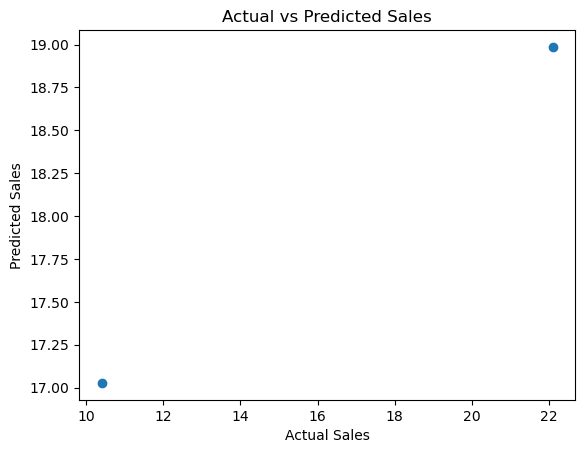

In [91]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()